## Info

### Attributes related with eating habits are:
- Frequent consumption of high caloric food (FAVC) : Yes, No

- Frequency of consumption of vegetables (FCVC) : 1, 2, 3 = Never, Sometimes,  Always

- Number of main meals (NCP) : 1, 2, 3 = Between 1 and 2, Three , more than three

- Consumption of food between meals (CAEC) : No, Sometime, Frequently, Always

- Consumption of water daily (CH20) : Yes, No

- Consumption of alcohol (CALC) : 1, 2, 3 = Less than a litter, Between 1L and 2L, More than 2L

### Attributes related with the physical condition are:
- Calories consumption monitoring (SCC) : Yes, No

- Physical activity frequency (FAF) : 0, 1, 2, 3 = I do not have, 1 or 2 days, 2 or 4 days, 4 or 5 days

- Time using technology devices (TUE) : 0, 1, 2 = 0-2 hours, 3-5 hours, More than 5 hours

- Transportation used (MTRANS), : Automobile, Motorbike, Bike, Public Transportation, Walking

### Other variables were:
- Gender : Male, Female

- Age : Numeric value

- Height : Numeric value (m)

- Weight : Numeric value (kg)


## Process

### Import Library

In [449]:
import pandas as pd
import matplotlib.pyplot as plt

### Import Data 

In [450]:
df = pd.read_csv("../data/ObesityDataSet_raw_and_data_sinthetic.csv").copy()

### Overview Data

In [451]:
df.shape

(2111, 17)

In [452]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [453]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


### Prepare Data

In [454]:
for col in df.columns :
    print(df[col].value_counts())

Age
18.000000    128
26.000000    101
21.000000     96
23.000000     89
19.000000     59
            ... 
23.320120      1
34.243146      1
18.549437      1
36.310292      1
23.664709      1
Name: count, Length: 1402, dtype: int64
Gender
Male      1068
Female    1043
Name: count, dtype: int64
Height
1.700000    60
1.650000    50
1.600000    43
1.750000    39
1.620000    36
            ..
1.842943     1
1.706082     1
1.704141     1
1.705813     1
1.738836     1
Name: count, Length: 1574, dtype: int64
Weight
80.000000     59
70.000000     43
50.000000     42
75.000000     40
60.000000     37
              ..
65.140408      1
87.279890      1
67.083121      1
90.138680      1
133.472641     1
Name: count, Length: 1525, dtype: int64
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64
FAVC
yes    1866
no      245
Name: count, dtype: int64
FCVC
3.000000    652
2.000000    600
1.000000     33
2.823179      2
2.214980      2
           ..

In [455]:
#check Nulls
print(df.isnull().sum())

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [456]:
# Check Duplicates
print(df.duplicated().sum())

24


In [457]:
# Drop Duplicates 
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


In [458]:
# Round for enhanced readability and consistency
df["Height"] = df["Height"].round(2)
df["Weight"] = df["Weight"].round(1)

for col in ["Age", "FCVC", "NCP", "CH2O", "TUE", "FAF"] :
    df[col] = df[col].round().astype("int")

In [459]:
# Create a BMI column
df["BMI"] = df["Weight"] / (df["Height"]**2)
df["BMI"] = df["BMI"].round(1)

### Exploratory Data Analysis

In [460]:
#https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f
def donutPlot(ax, column, colors=['royalblue','lightskyblue', 'cornflowerblue', 'dodgerblue']):
    labels = df[column].unique()
    counts = df[column].value_counts()
    sizes = []
    for label in labels:
        sizes.append(counts.get(label, 0))
    
    # Add gap between segments using 'wedgeprops'
    ax.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=90, 
           wedgeprops={'edgecolor': 'white', 'linewidth': 2})

    # Draw the inner white circle to make it a donut plot
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    ax.add_artist(centre_circle)
    

    # Equal aspect ratio ensures that pie is drawn as a circle
    ax.axis('equal')  


    

In [461]:
def horizontalBarChart(ax, column, colors=['royalblue','lightskyblue', 'cornflowerblue', 'dodgerblue']):
    counts = df[column].value_counts()

    # Sort the counts in descending order
    counts = counts.sort_values(ascending=True)

    # Create a color mapping for the bars based on the unique labels
    color_mapping = {label: colors[i % len(colors)] for i, label in enumerate(counts.index)}

    # Create a horizontal bar chart
    bars = ax.barh(counts.index, counts.values, color=[color_mapping[label] for label in counts.index], edgecolor='none')  # Use color mapping

    # Add counts on the bars
    for bar in bars:
        ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, str(int(bar.get_width())), 
                va='center', ha='left', fontsize=10)  # Position the count at the end of each bar

    # Hide spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)

    # Hide x-axis ticks and labels
    # ax.get_xaxis().set_visible(False)
    
    # Display the y-ticks (labels) but hide the y-axis line
    ax.tick_params(axis='y', which='both', length=0)  # Hide ticks but keep labels

    # Set the y-axis labels
    ax.set_yticks(counts.index)  # Set the y-tick positions
    ax.set_yticklabels(counts.index, fontsize=10)  # Set the y-tick labels



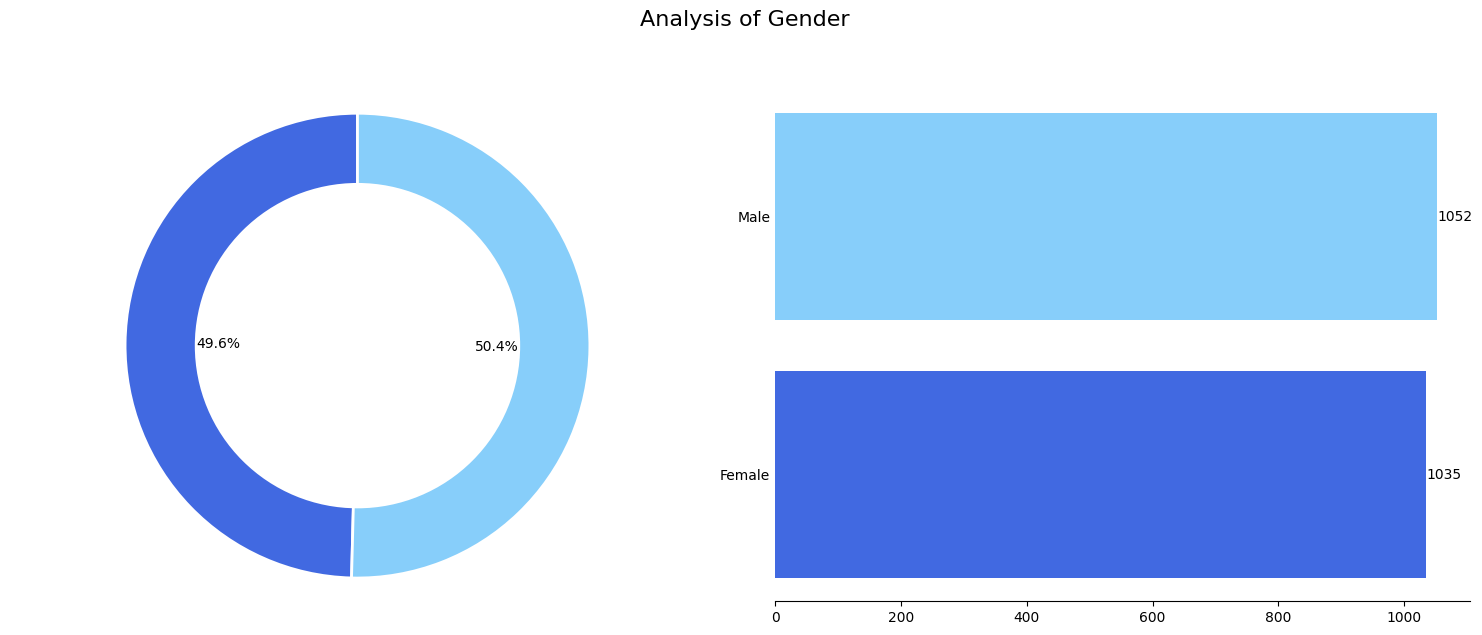

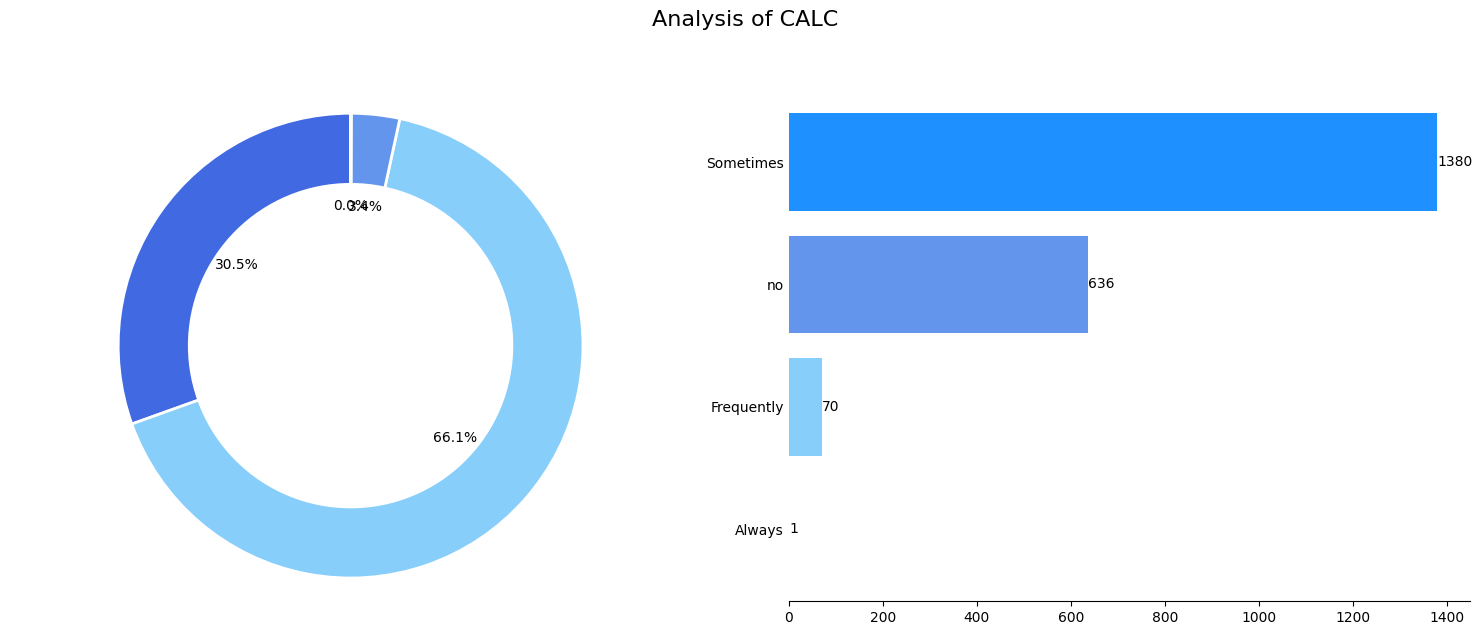

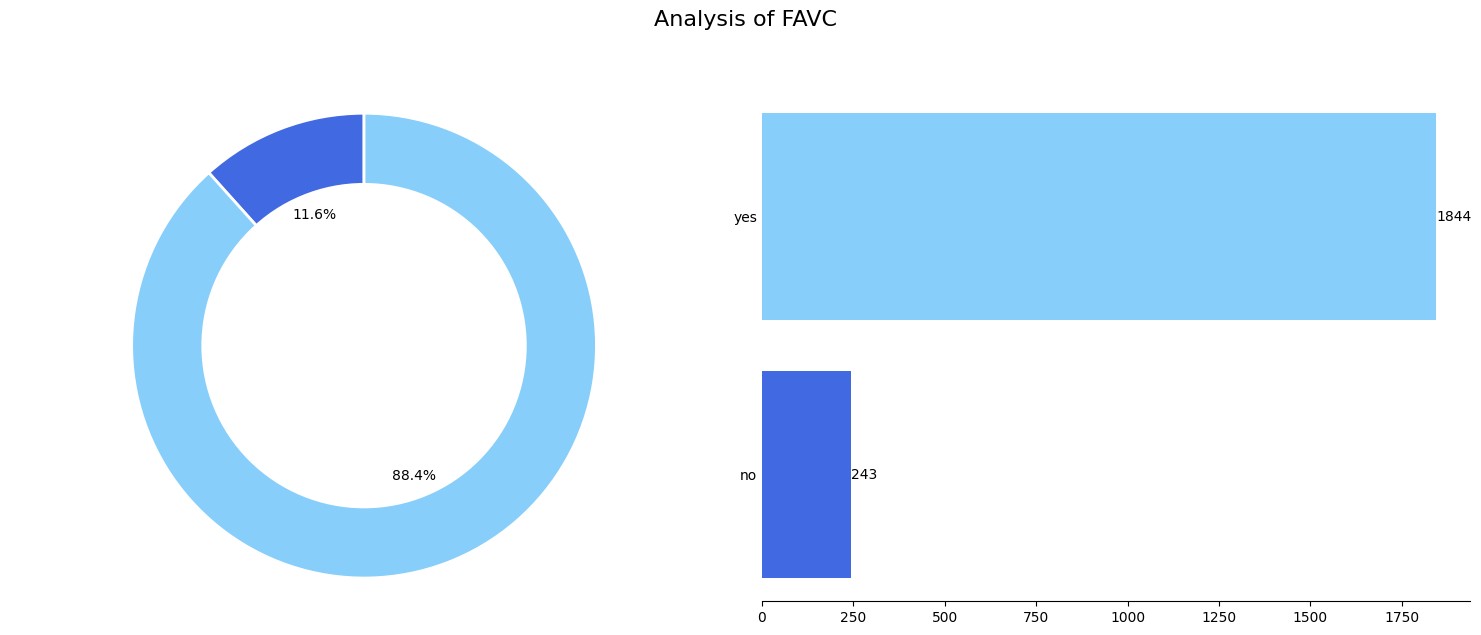

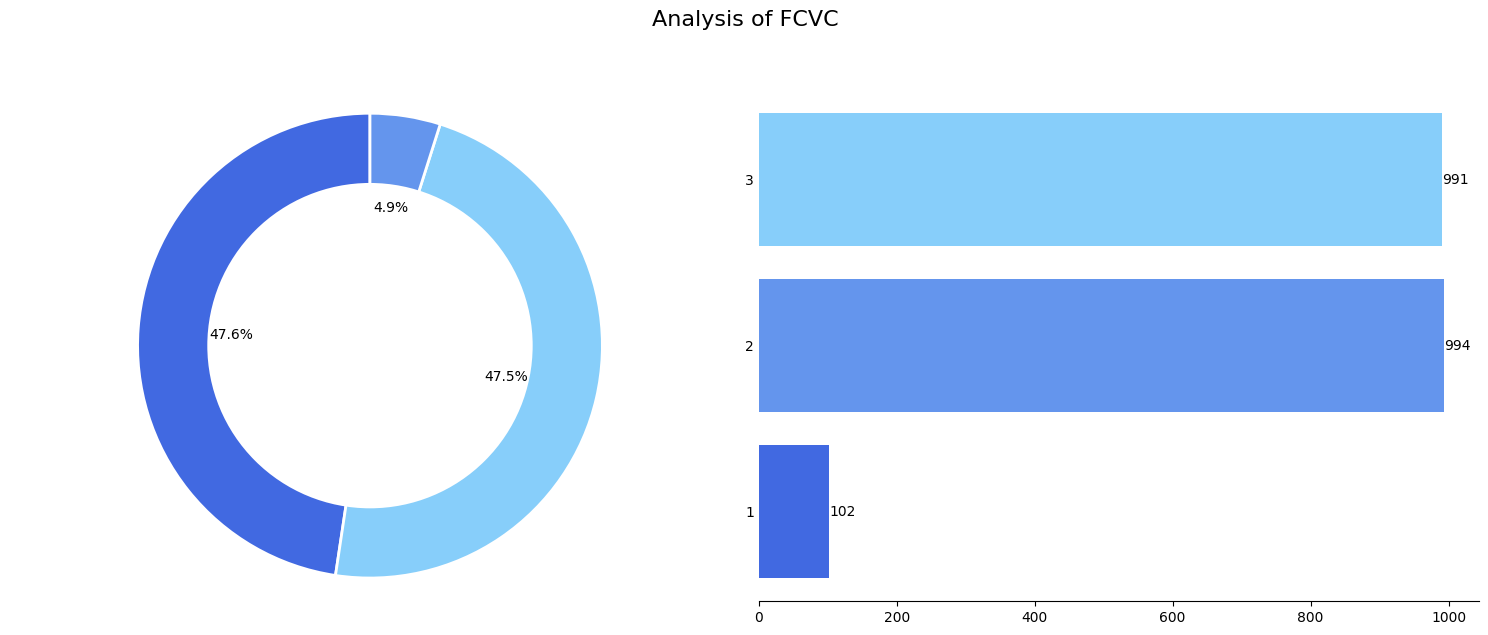

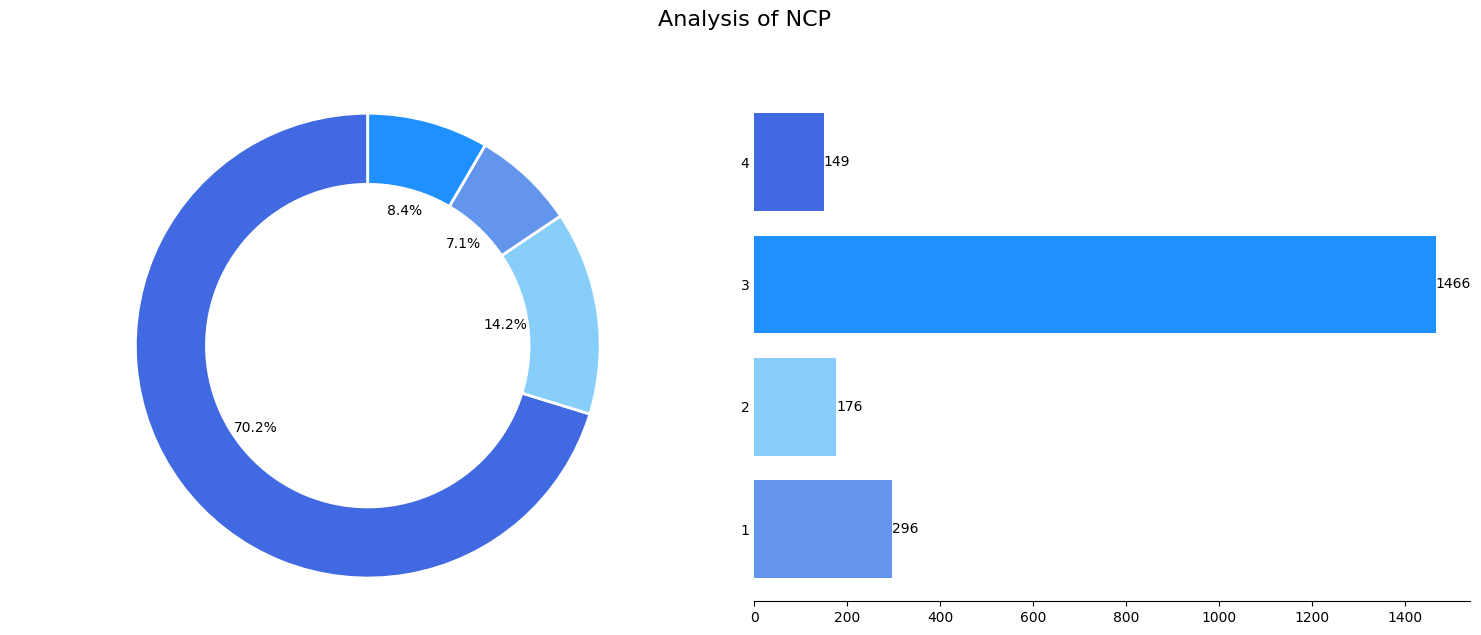

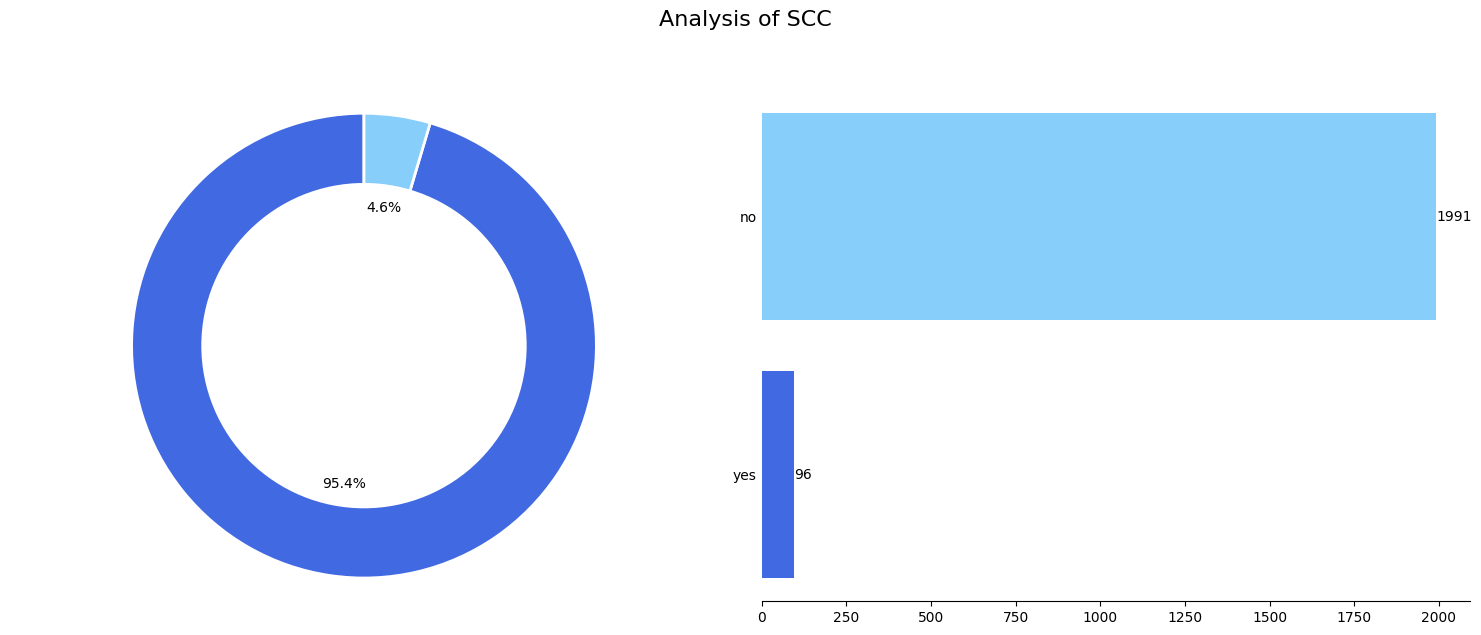

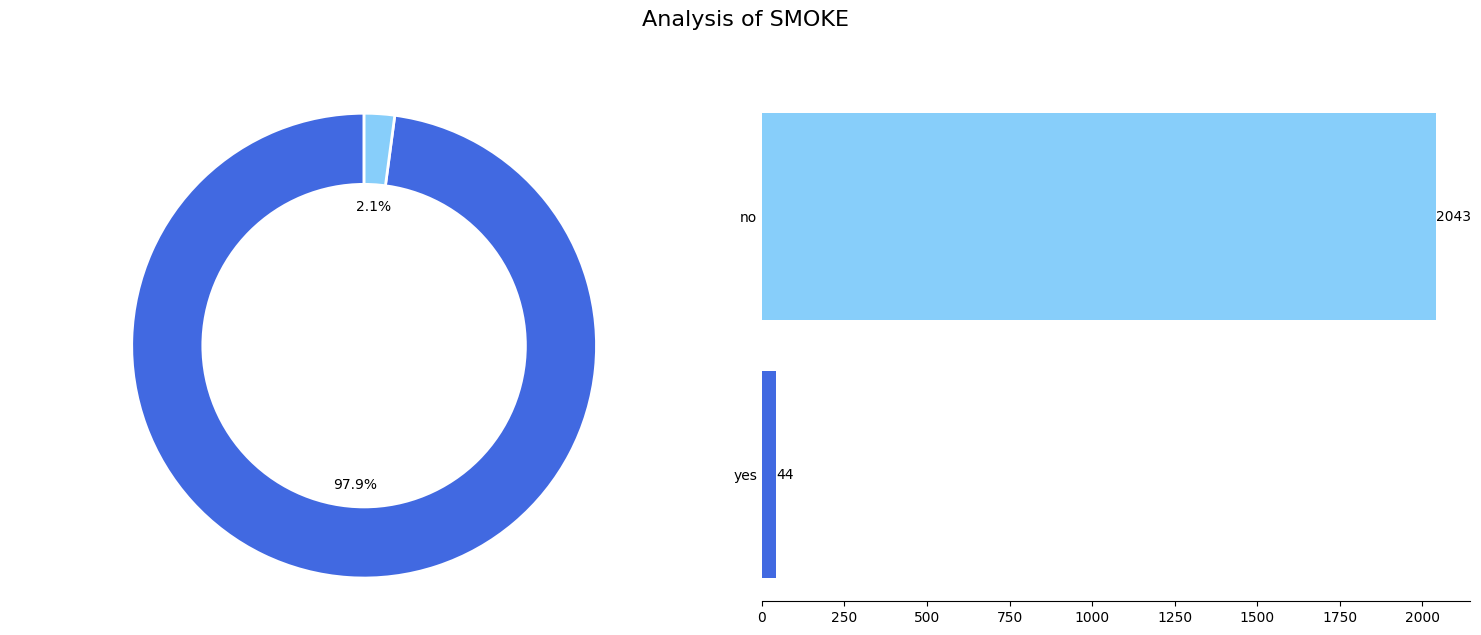

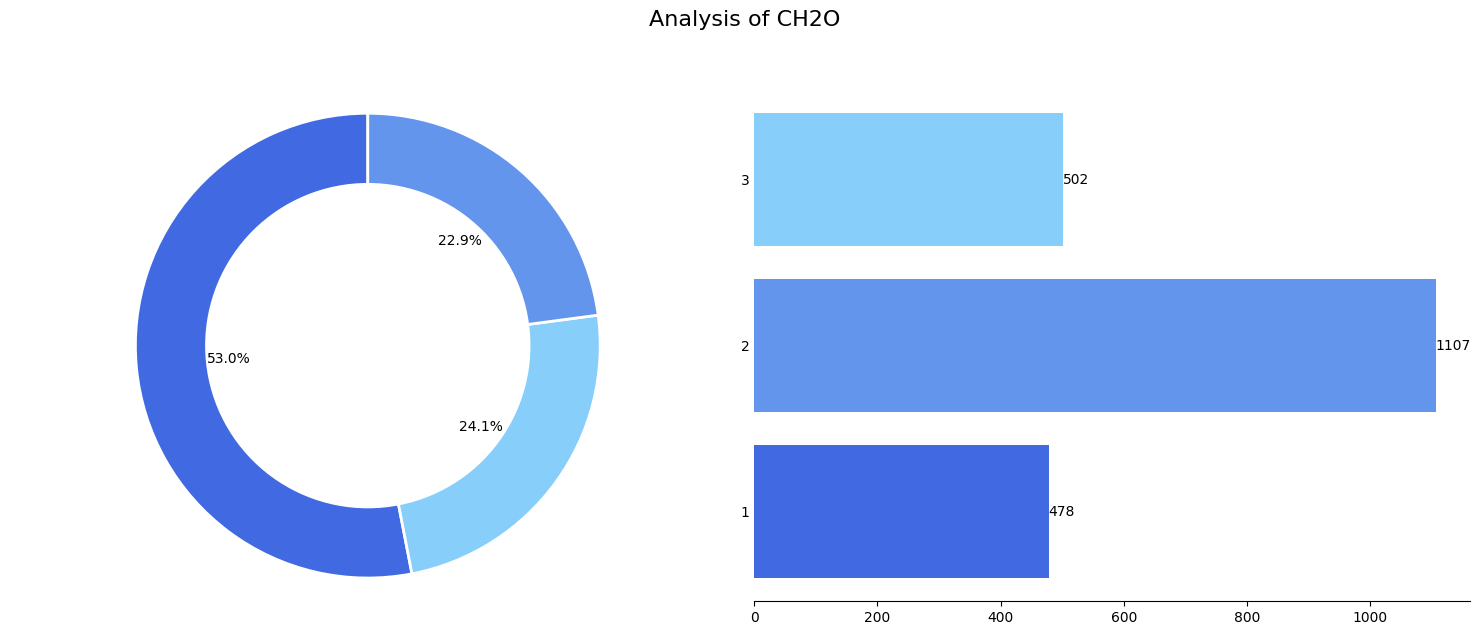

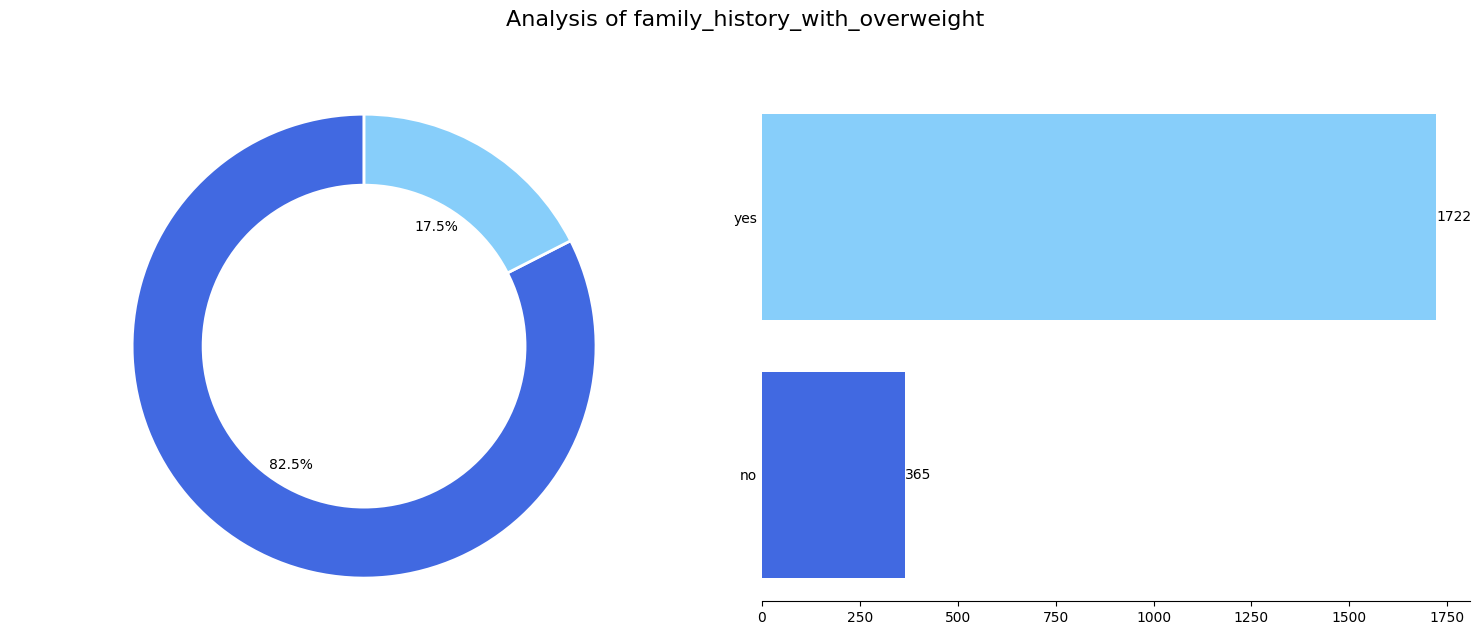

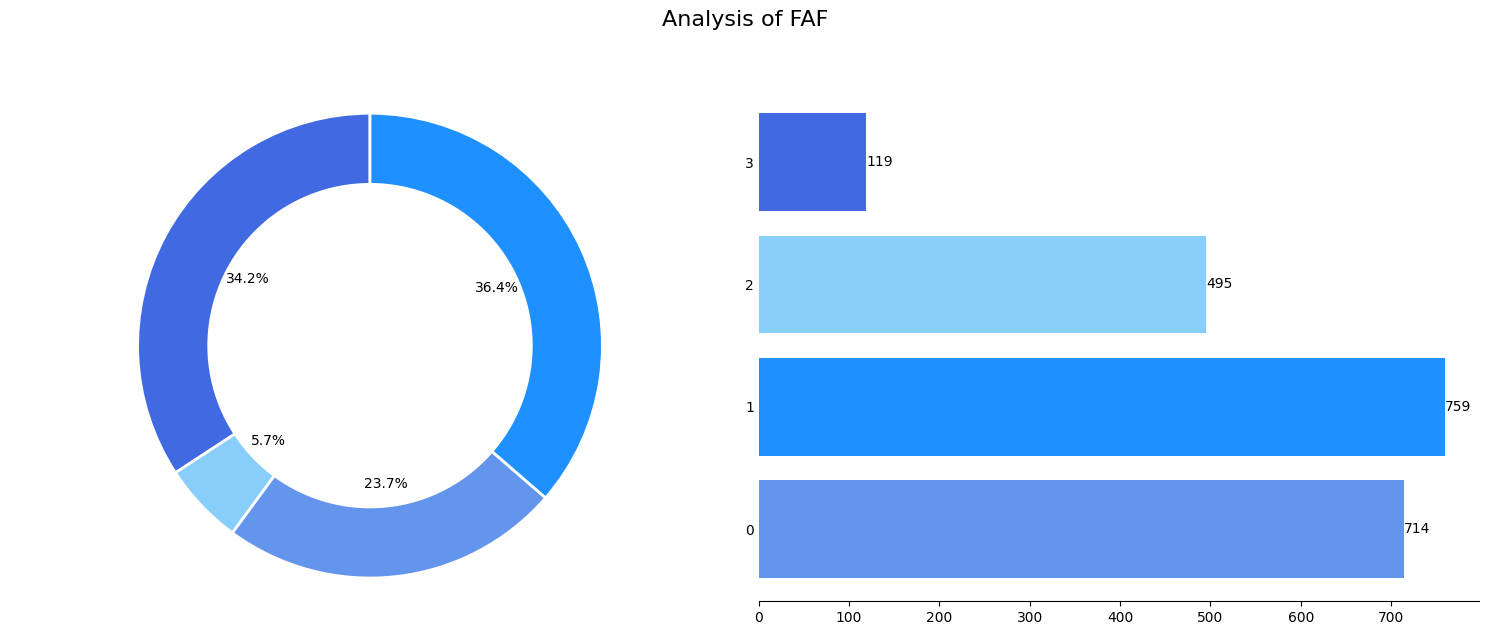

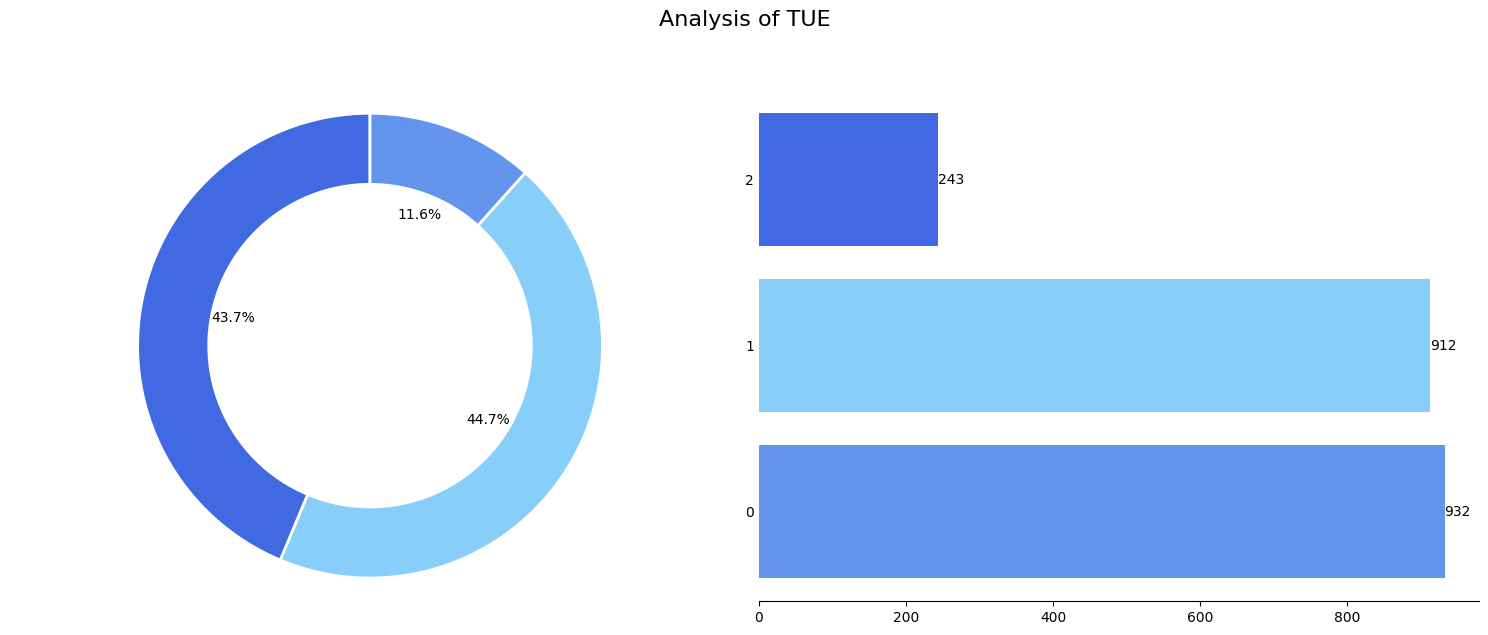

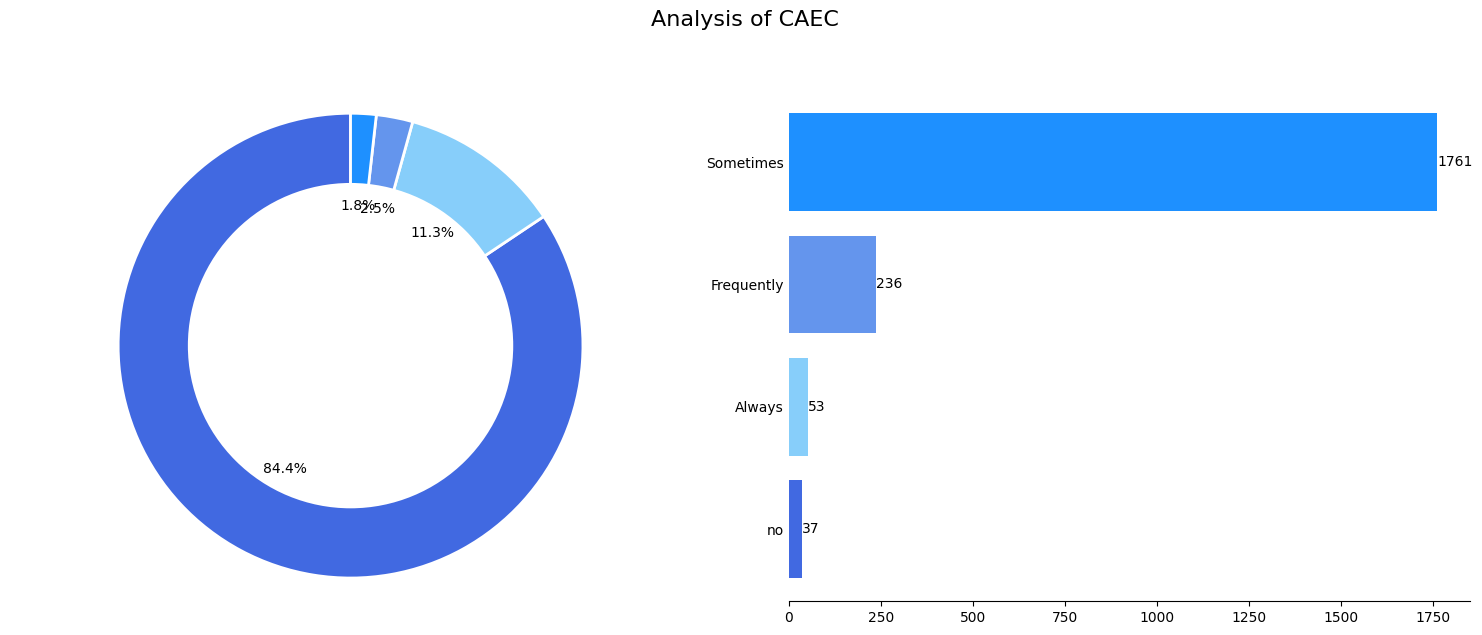

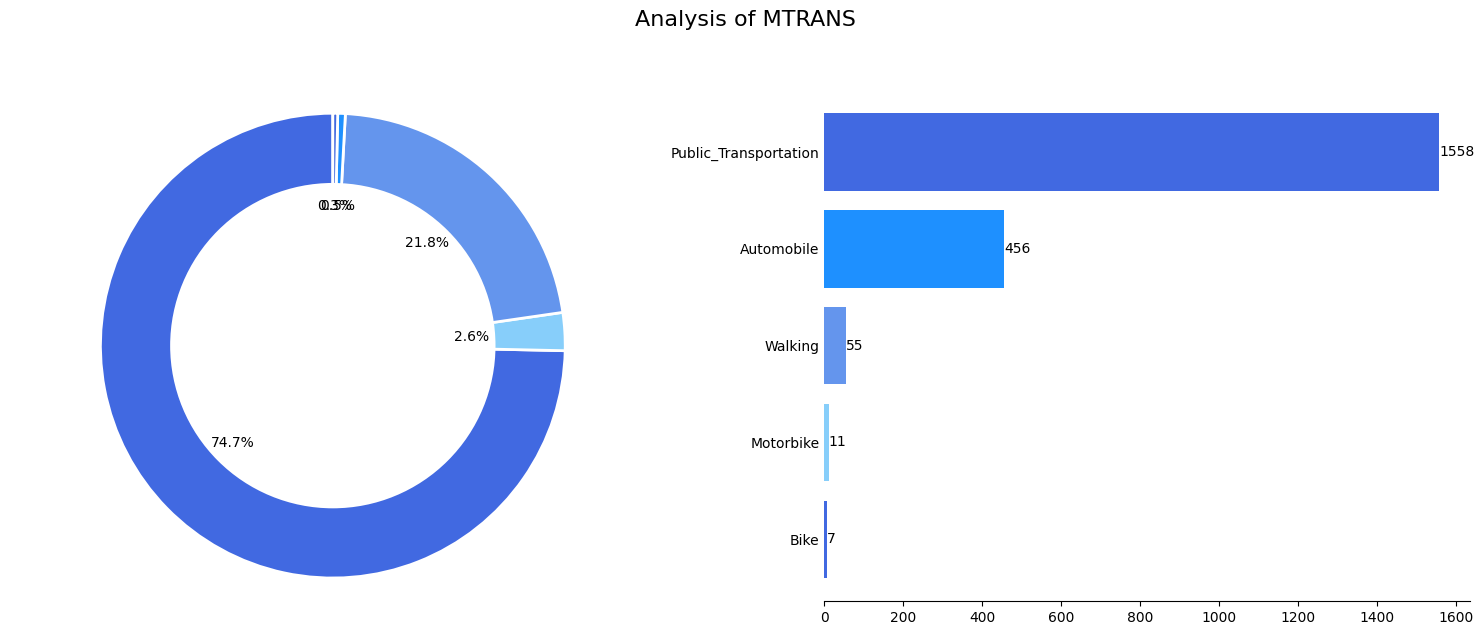

In [462]:
col = ['Gender', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS']

for c in col:
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    donutPlot(ax1, c) 
    horizontalBarChart(ax2, c) 

    plt.suptitle(f'Analysis of {c}', fontsize=16, y=1.05)

    plt.tight_layout()
    plt.show()  


### Pre-Processing

In [463]:
#convert categorical value to numerical value
df["Gender"] = df["Gender"].replace({'Male': 1, 'Female': 0}).astype(int)

for column in ["family_history_with_overweight", "FAVC", "SMOKE", "SCC"] :
    df[column] = df[column].replace({'yes': 1, 'no': 0}).astype(int) 

df["CAEC"] = df["CAEC"].replace({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}).astype(int)  
df["CALC"] = df["CALC"].replace({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}).astype(int)  
df["MTRANS"] = df["MTRANS"].replace({'Automobile': 0, 'Motorbike': 1, 'Bike': 2, 'Public_Transportation': 3, 'Walking': 4}).astype(int)  
df["NObeyesdad"] = df["NObeyesdad"].replace({'Insufficient_Weight': 0,  'Normal_Weight': 1, 'Overweight_Level_I':2, 'Overweight_Level_II':3, 'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6}) 

/var/folders/r6/7bt7z9hj0hz2kv_sf00x8vdh0000gn/T/ipykernel_75251/1045598543.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"] = df["Gender"].replace({'Male': 1, 'Female': 0}).astype(int)
/var/folders/r6/7bt7z9hj0hz2kv_sf00x8vdh0000gn/T/ipykernel_75251/1045598543.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace({'yes': 1, 'no': 0}).astype(int)
/var/folders/r6/7bt7z9hj0hz2kv_sf00x8vdh0000gn/T/ipykernel_75251/1045598543.py:5: FutureWarning: Downcasting behavior in `replace` is depreca

In [464]:
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad', 'BMI'],
      dtype='object')

In [465]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


X = df.drop(['NObeyesdad','BMI'], axis=1)
y = df['NObeyesdad']           

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [466]:
# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model's performance
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.9569377990430622
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        59
           1       0.85      0.92      0.88        61
           2       0.96      0.91      0.93        55
           3       0.96      0.96      0.96        49
           4       0.99      0.97      0.98        70
           5       1.00      1.00      1.00        64
           6       1.00      1.00      1.00        60

    accuracy                           0.96       418
   macro avg       0.96      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418



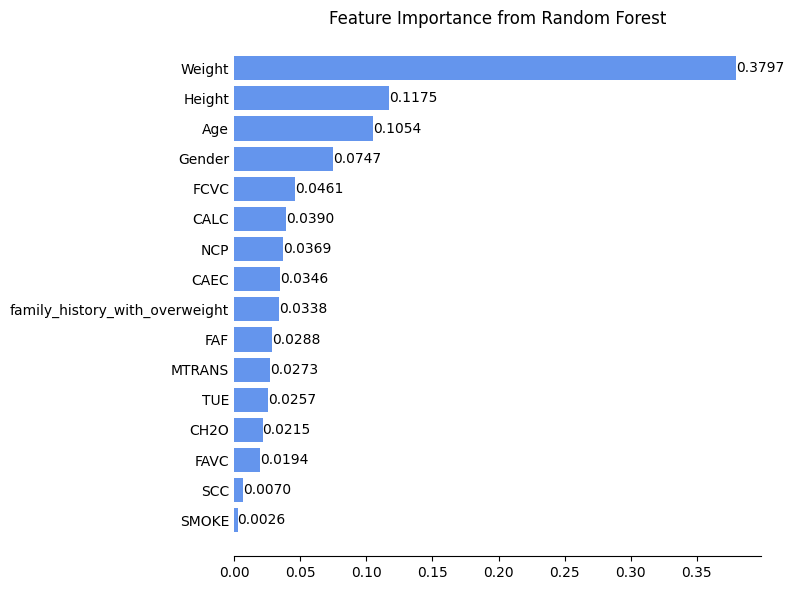

In [467]:
# Extract feature importances
importances = model.feature_importances_
features = X.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
# importance_df = importance_df[importance_df["Feature"]!="BMI"]
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Create a color mapping for the bars
colors = ['cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue']
color_mapping = {label: colors[i % len(colors)] for i, label in enumerate(importance_df['Feature'])}

# Create a figure and axes for the bar chart
fig, ax = plt.subplots(figsize=(8, 6))

# Create a horizontal bar chart
bars = ax.barh(importance_df['Feature'], importance_df['Importance'], 
               color=[color_mapping[label] for label in importance_df['Feature']], edgecolor='none')

# Add counts on the bars
for bar in bars:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, 
            f"{bar.get_width():.4f}", va='center', ha='left', fontsize=10)

# Hide spines and ticks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='y', which='both', length=0)

# Set the y-axis labels
ax.set_yticks(importance_df['Feature'])  # Set the y-tick positions
ax.set_yticklabels(importance_df['Feature'], fontsize=10)  # Set the y-tick labels

# Set the title for the plot
ax.set_title('Feature Importance from Random Forest', fontsize=12)

# Show the plot
plt.tight_layout()  # Adjust the layout
plt.show()